<a href="https://colab.research.google.com/github/Muku2003-code/Car_Price_Prediction/blob/main/car_price_pridiction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Step 2: Load Dataset from Correct Path
df = pd.read_csv("/content/drive/MyDrive/car data.csv")
df.head()


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
# Step 3: Check data structure and missing values
print(df.info())
print("\nMissing Values:\n", df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
None

Missing Values:
 Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64


In [6]:
# Strip any whitespace (best practice)
df.columns = df.columns.str.strip()

# Check unique values
print("Fuel types:", df['Fuel_Type'].unique())
print("Selling types:", df['Selling_type'].unique())
print("Transmission types:", df['Transmission'].unique())


Fuel types: ['Petrol' 'Diesel' 'CNG']
Selling types: ['Dealer' 'Individual']
Transmission types: ['Manual' 'Automatic']


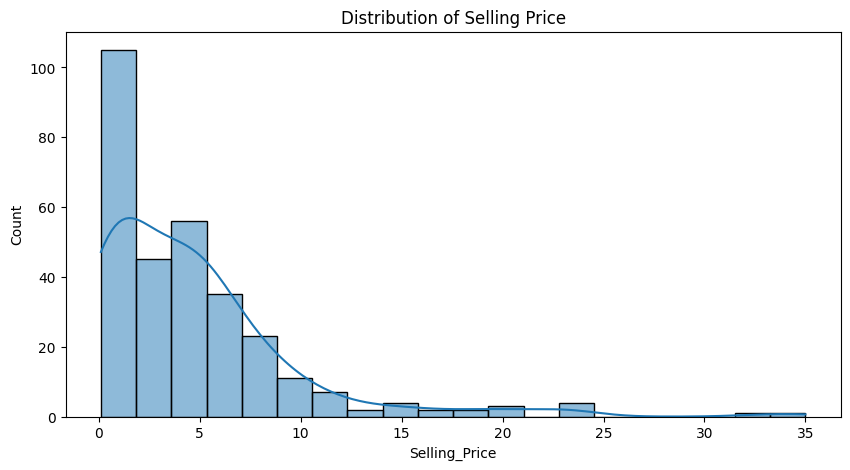

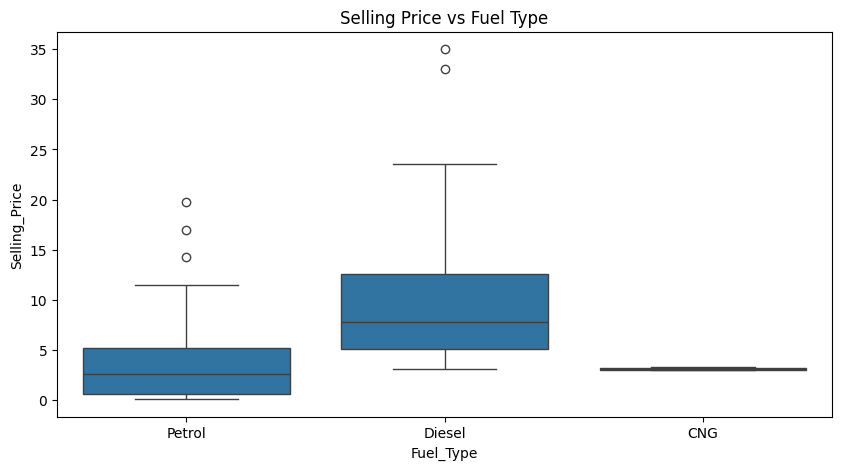

In [7]:
# Distribution of car prices
plt.figure(figsize=(10, 5))
sns.histplot(df['Selling_Price'], kde=True, bins=20)
plt.title("Distribution of Selling Price")
plt.show()

# Price vs Fuel Type
plt.figure(figsize=(10, 5))
sns.boxplot(x='Fuel_Type', y='Selling_Price', data=df)
plt.title("Selling Price vs Fuel Type")
plt.show()


In [8]:
le = LabelEncoder()
df['Fuel_Type'] = le.fit_transform(df['Fuel_Type'])           # Petrol=2, Diesel=1, CNG=0
df['Selling_type'] = le.fit_transform(df['Selling_type'])     # Dealer=0, Individual=1
df['Transmission'] = le.fit_transform(df['Transmission'])     # Manual=1, Automatic=0


In [9]:
# Drop 'Car_Name' as it's not useful
X = df.drop(['Selling_Price', 'Car_Name'], axis=1)
y = df['Selling_Price']


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

print("🔹 Linear Regression:")
print("R² Score:", r2_score(y_test, y_pred_lr))
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("MSE:", mean_squared_error(y_test, y_pred_lr))


🔹 Linear Regression:
R² Score: 0.8466902419662664
MAE: 1.2219323621752294
MSE: 3.5315798889713164


In [12]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("🔹 Random Forest Regressor:")
print("R² Score:", r2_score(y_test, y_pred_rf))
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))


🔹 Random Forest Regressor:
R² Score: 0.9630473458807466
MAE: 0.6171081967213115
MSE: 0.8512259872131138


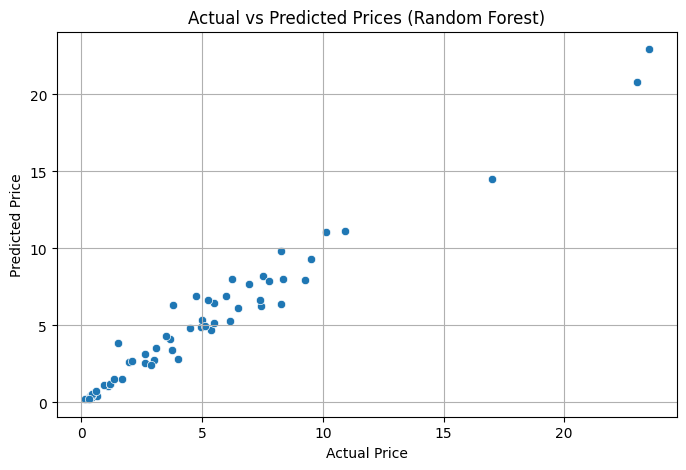

In [13]:
# Plot predictions (Random Forest)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices (Random Forest)")
plt.grid(True)
plt.show()


In [14]:
# Example new input: [Year, Present_Price, Kms_Driven, Fuel_Type, Selling_type, Transmission, Owner]
sample = [[2018, 7.5, 40000, 2, 0, 1, 0]]  # Petrol, Dealer, Manual, Owner=0
prediction = rf_model.predict(sample)
print("Predicted Price:", round(prediction[0], 2), "Lakh")


Predicted Price: 5.2 Lakh


In [15]:
import joblib
joblib.dump(rf_model,'car_price_predictor')
model = joblib.load('car_price_predictor')

In [16]:
import joblib

# Save the Random Forest model using joblib
filename = 'car_prediction.json'
joblib.dump(rf_model, filename)

print(f"Random Forest Regressor model saved as {filename}")

Random Forest Regressor model saved as car_prediction.json
